In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df_ = pd.read_csv("breast_cancer_data")

df_.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Exploratory Data Analysis

In [3]:
# 

df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Remove columns: 'id' amd "Unamed: 32"   -meaningless

df = df_.drop(columns = ['id', 'Unnamed: 32'], 
              axis= 1 )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

The count is: diagnosis
B    357
M    212
Name: count, dtype: int64




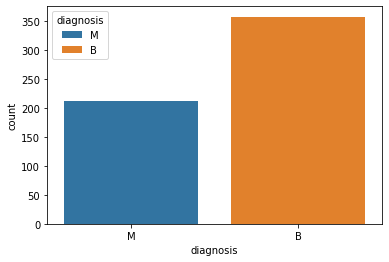

In [5]:
# Count of Response variable

ax = sns.countplot(x = "diagnosis",
                  data = df,
                  hue = 'diagnosis',
                  legend = 'full')

print("The count is:", df['diagnosis'].value_counts() )

print("\n")


plt.show()

# M - Malignant
# B - Benign

### Insight:
* There are 357 benign (non-cancerous) tumurs
* There are 212 malignant (cancerous) tumurs

## Split the data
* Change the response variable to be numeric
* Split the data into training and test set
* To ensure consistency, this splitted data will be used for all the different models

In [6]:
# response variable from categorical to numeric

df['diagnosis'] = df['diagnosis'].map({'B': 0,
                                       'M': 1})

In [7]:
# check update of response variable

df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## Should we use this data or standardize before using?

* Standardization Check: 

    * Plot the distribution of the data (without response variable) before- and after- standardization
    * Observe the plots and values of the data
    
    

* Make conclusions and decide which (before- or after- stdtn) to use for model building

In [8]:
# Extract the predictors OR exclude the response variable

df_predictors = df.drop('diagnosis', axis = 1)

In [9]:
# Distribution of original data

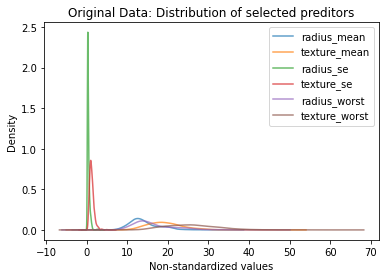

In [10]:
# density plot

selected_cols = df_predictors[['radius_mean', 'texture_mean', 'radius_se', 'texture_se', 'radius_worst', 'texture_worst']] 

for column in selected_cols:
    df[column].plot(kind='density', 
                    alpha = 0.7,  # visibility of the lines/plot
                    label = column)
    
plt.title("Original Data: Distribution of selected preditors")
plt.xlabel('Non-standardized values')
plt.legend()

In [11]:
# See the description of the data

df_predictors.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Non-standardized Insights:
* It is OBVIOUS that the original data does not follow a standard distribution:

* Density Plot - we expected an idea case where each plot is centered around the mean = 0, hence overlaid on each other

* Descriptive statistics - the means and standard deviation is shown to be distinct

#### ------------------------------------------------------

* Now, because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the SCALE of the variables actually matters alot: 

    * In the sense that, any feature/variable in a large (small) scale will have a much larger (smaller) effect on the distance between observation

    * To fix this, we must standardize every feature/variable to be the same scale 

* STANDARDIZATION vs Normalization
  * Standardization: _**transforms**_ the data to have mean = 0 and std = 1. This is a MUST for each feature/column/variable

   
  * Normalization: **_rescales_** the data to specific range. The mean and std does not have to be unique across board but EACH feature/column/variable MUST range from (typically) 0 to 1 or -1 to 1

In [12]:
# Do the data split

# (recall x-variables: df_predictors)

# set the y-variable 
df_response = df['diagnosis']

# split data
X_train, X_test, y_train, y_test = train_test_split(df_predictors,
                                                    df_response, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

# confirm the shape of splits
print("Shape of training data: ", X_train.shape)
print("Shape of RESPONSE training data: ", y_train.shape)

print("\n")

print("Shape of test data: ", X_test.shape)
print("Shape of RESPONSE test data: ", y_test.shape)

Shape of training data:  (455, 30)
Shape of RESPONSE training data:  (455,)


Shape of test data:  (114, 30)
Shape of RESPONSE test data:  (114,)


In [13]:
# Standardization

from sklearn.preprocessing import StandardScaler

# create an instance for standard scalar
scaler = StandardScaler()

# fit the data to be transformed
scaler.fit(X_train)

StandardScaler()

What is **.fit( )** doing?
   * The scaler "learns" during .fit()
   * It internally stores: $mean_$ and $scale_$ (standard_deviation) from the training data

Why do we only .fit( ) the train_data?
   * **Avoids data leakage** which happens when we .fit( ) on the full data (train + test). Data leakage occurs when information from your test set "leaks" into your training process. This will make the model perform better than it actually should
   * Because, if the **scaler** also uses test data statistics (i.e. full data), our test performance will be artificially inflated
   * Hence, the model may not perform well on truly unseen data, as it's expected when model is deployed in real-world scenario

In [14]:
# Use the Scalar object to do the transformation
X_train_scaled = scaler.transform( X_train )
X_test_scaled = scaler.transform( X_test )

What is **.transform( )** doing?    
    
$$ X\_train\_scaled =  \frac{( X\_train - scaler.mean\_) }{scaler.scale\_} $$

Same formula is used for $X\_test\_scaled$

###### -------
Insights:

   * Here, the scaler applies the same scaling rules or formula to both training and test data
   * Test data gets transfored using **training data's statistics**
   * The scaler doesn't need to "see" test data during .fit() because it just applies a mathematical formula using the stored training statistics. This is exactly what we want for realistic (or real-world) model evaluation

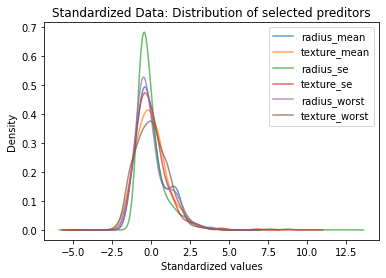

In [15]:
# since scaled_train_ and scaled_test_ data are lists, convert to dataframe to it simpler to plot

df_X_train_scaled = pd.DataFrame(X_train_scaled,
                                 columns = df_predictors.columns)

df_X_test_scaled = pd.DataFrame(X_test_scaled,
                                columns = df_predictors.columns)

# Plot the train data

# using the same 'selected column' but now on the scaled_dataset

for column in selected_cols:
    df_X_train_scaled[column].plot(kind='density',    # take note of the change in df
                                   alpha = 0.7,             # visibility of the lines/plot
                                   label = column)

plt.title("Standardized Data: Distribution of selected preditors")
plt.xlabel('Standardized values')
plt.legend()

In [16]:
# Using descriptive statistics

df_X_train_scaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-3.162306e-16,-3.513673e-17,-1.132183e-16,3.669836e-16,-2.381489e-16,-4.294489e-17,-5.953723e-17,2.225326e-16,1.444510e-16,5.055785e-16,...,-7.027346e-17,-6.754060e-16,-2.928061e-17,1.815398e-16,-1.561632e-17,-2.249727e-16,-7.612958e-17,-8.198570e-17,5.153387e-16,2.147245e-17
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-1.819583e+00,-2.223500e+00,-1.809497e+00,-1.365036e+00,-3.100011e+00,-1.607228e+00,-1.119899e+00,-1.269910e+00,-2.345430e+00,-1.776889e+00,...,-1.572438e+00,-2.230887e+00,-1.578174e+00,-1.152259e+00,-2.617938e+00,-1.455995e+00,-1.312795e+00,-1.749805e+00,-2.124261e+00,-1.616973e+00
25%,-6.830930e-01,-7.075360e-01,-6.907613e-01,-6.602049e-01,-7.132037e-01,-7.770872e-01,-7.505387e-01,-7.349048e-01,-7.010461e-01,-7.097920e-01,...,-6.616975e-01,-7.412292e-01,-6.853483e-01,-6.358132e-01,-7.430298e-01,-6.961323e-01,-7.555873e-01,-7.700987e-01,-6.499846e-01,-7.189616e-01
50%,-2.314983e-01,-1.185158e-01,-2.429378e-01,-2.895973e-01,-8.082013e-02,-2.413402e-01,-3.446456e-01,-3.911235e-01,-6.915087e-02,-1.772851e-01,...,-2.632354e-01,-5.210786e-02,-2.829543e-01,-3.357508e-01,-2.741590e-02,-2.753858e-01,-2.304110e-01,-2.386392e-01,-1.236838e-01,-2.135847e-01
75%,4.593426e-01,5.631988e-01,4.884799e-01,3.193386e-01,6.331729e-01,5.281282e-01,5.473870e-01,6.737569e-01,5.354290e-01,4.642225e-01,...,4.525400e-01,6.857059e-01,5.263332e-01,2.724862e-01,6.296478e-01,5.738568e-01,5.383496e-01,7.189995e-01,4.319440e-01,4.600643e-01
max,3.961679e+00,4.715674e+00,3.976811e+00,5.208312e+00,4.864642e+00,3.964311e+00,4.256736e+00,4.022271e+00,4.476124e+00,4.815921e+00,...,4.120889e+00,3.962127e+00,4.322305e+00,5.955420e+00,3.767506e+00,4.424833e+00,4.672828e+00,2.709674e+00,5.917679e+00,4.999482e+00


### Standardized Insights

* Outside of the plots which clearly shows that the data is standardized (plots centered around same mean = 0), we see the descriptive statistics having mean = 0 and std = 1 for all features/variables. This is a WIN for our next step

### Moving forward
$$ X\_train\_scaled = X\_train $$


$$ X\_test\_scaled = X\_test $$

# K Nearest Neighbor Model

* Now, we have a standardized data and can now use the KNN algorithm which depends on the distance between each features/variable

* REMEMBER, we are trying to predict/diagnose whether the tumor is benign or malignant

* Later on, we will employ the 'Elbow Method' to choose the most appropraite K-value

* <span style="color: blue;">K Nearest Neighbor</span> is a supervised <span style="color: blue;">Non-parametric</span> machine learning algorithm

### Model Training: KNN

In [17]:
# KNN Algorithm


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 1)   # when k=1

In [18]:
# fit the data into model

knn.fit(X = X_train_scaled, 
       y = y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
prediction_knn = knn.predict(X_test_scaled)

In [20]:
# Do an evaluation of the newly predicted model (when k = 1)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print('\n', 'Confusion Matrix:')
print(confusion_matrix(y_test, prediction_knn))

print('\n', 'Classification Report:')
print(classification_report(y_test, prediction_knn))


 Confusion Matrix:
[[68  3]
 [ 4 39]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## Key Insights (for K-NN):
* It seems our prediction is already doing great with $ k=1 $ but we cannot conclude just yet
* Regardless, let's go ahead and use the 'Elbow Method' to get the best value of $k$
* Elbow Method, also helps us avoid overfitting when we use the right $k$ value

In [21]:
# Elbow Method
# plot (check the results of) many k-values, in the KNN model above

error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier( n_neighbors= i )
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))   # mean not equal to the y_test

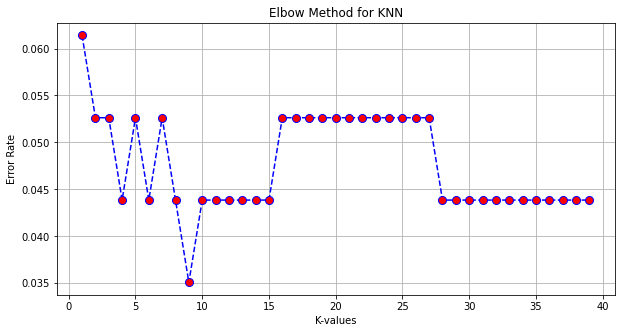

In [22]:
# Plot this error rate to make it easy to read

plt.figure(figsize = (10, 5))
plt.plot(range(1, 40), 
         error_rate,
         color = 'blue',
         linestyle = 'dashed',
         marker = 'o',
         markerfacecolor = 'red',
         markersize = 8)

plt.title('Elbow Method for KNN')
plt.xlabel('K-values')
plt.ylabel('Error Rate')

plt.grid(True)

## Note (for K-NN):
* We need the K-value with the lowest error rate
* Here, that K-value is 9

In [23]:
# We chose K-value = 9

knn = KNeighborsClassifier( n_neighbors = 9 )
knn.fit(X_train_scaled, y_train)
prediction_knn_ = knn.predict(X_test_scaled)


print('\n', 'Confusion Matrix:')
print(confusion_matrix(y_test, prediction_knn_))

print('\n', 'Classification Report:')
print(classification_report(y_test, prediction_knn_))


 Confusion Matrix:
[[69  2]
 [ 2 41]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [24]:
# Accuracy

knn_accuracy = accuracy_score(y_test, prediction_knn_)
knn_accuracy_3sf = round(knn_accuracy, 3)

print(f"Accuracy of K Nearest Neighbor Classifier Model is: {knn_accuracy_3sf} ")

Accuracy of K Nearest Neighbor Classifier Model is: 0.965 


<hr style="background-color: green; height: 2px; border: none;"> 
<hr style="background-color: green; height: 2px; border: none;"> 


##  <span style="color: green;">For FUN: Make predictions using already built model</span> 

<span style="color: green;">
    
    * Since we do not have a fresh dataset,
    * ...we will randomly select 100 (of the 569) rows in our original dataset
    * ...scale them, and make predictions using the model we just built
    * ...note: excluding the response variable from our random selection
</span> 
    

<span style="color: green;">The **GOAL** here is to implement the built model like in real life not necessarily to see accuracy (since we are using the same dataset)</span> 

In [25]:
# data preparation

# data selection: 100 random rows
new_df = df.sample(n=100, random_state=42).reset_index(drop=True)

# drop 'response' variable
new_predictors =  new_df.drop(['diagnosis'], axis = 1)

# view the data
new_predictors.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
1,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
2,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
3,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
4,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [26]:
# Scale the data
new_scaler = StandardScaler()

# fit the data into standard scaler - like a regular ML model
new_scaler.fit( new_predictors ) 

# do the scaling/standardization
new_predictors_scaled = new_scaler.transform( new_predictors )

# convert list to dataframe
new_predictors_scaled_df = pd.DataFrame(new_predictors_scaled, 
                                     columns= new_predictors.columns) 

In [27]:
new_predictors_scaled_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.458330,-0.250239,-0.435752,-0.490212,0.025338,-0.040794,-0.107588,-0.306585,0.360859,0.065706,...,-0.249799,-0.239105,-0.306985,-0.349748,0.292018,-0.130356,0.008788,-0.202731,0.206987,0.137521
1,1.432782,0.376921,1.339598,1.477827,-0.612946,-0.092802,0.224921,0.661453,-0.888381,-1.324632,...,1.896100,0.079395,1.840266,1.989954,-0.749164,-0.154793,0.016235,0.942624,-0.595717,-0.960472
2,0.415615,-0.046586,0.424986,0.320568,0.662953,0.255114,0.684128,0.693330,0.382712,-0.813927,...,0.681031,-0.015827,0.579890,0.591765,0.828249,-0.121047,0.530064,0.535683,-0.099879,-0.233896
3,-0.478791,-0.463150,-0.419882,-0.533029,0.409242,0.421899,-0.138995,-0.546134,-0.054340,1.177061,...,-0.703280,-0.523128,-0.504956,-0.668968,0.399264,0.015683,-0.115946,-0.614111,-0.587049,0.446951
4,-0.730160,-1.212965,-0.704707,-0.730106,0.038023,0.070396,-0.258437,-0.594184,-0.028845,0.689223,...,-0.837805,-1.053415,-0.837880,-0.783187,-0.069938,-0.281631,-0.397993,-0.680998,-0.980599,-0.175465


In [28]:
# get new prediction using already built model: "knn"
new_diagnosis = knn.predict(new_predictors_scaled_df)

C:\Newfolder\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [29]:
print("New Target Class:", new_diagnosis)
print("The shape:", new_diagnosis.shape)

New Target Class: [0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1]
The shape: (100,)


In [30]:
# Now put this prediction into the dataframe
new_predictors['Predicted Diagnosis'] = new_diagnosis

# relocate this column to be the first column
updated_df = new_predictors[ ['Predicted Diagnosis'] + new_predictors.columns[:-1].tolist() ]

In [31]:
updated_df.head()

,Predicted Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
1,1,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
2,1,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
3,0,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
4,0,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


##  <span style="color: green;">Closing Note -KNN (for new test data)</span> 

* Observe that we did not do a "Classficification Report" because this is only needed when we are **testing the model** not when we are **using it**

<hr style="background-color: green; height: 3px; border: none;"> 
<hr style="background-color: green; height: 3px; border: none;"> 


# Random Forest

* <span style="color: blue;">Random Forest</span> (RF) is a supervised <span style="color: blue;">Non-parametric</span> machine learning algorithm
* RF an extension or basically multiple decision trees
* RF is an ensemble learning method that builds many decision trees during training time and outputs the majority vote (for classification) or average (for regression) of the individual trees. In this project, we employ the former.
* It’s called a “forest” because it’s essentially a collection of decision trees trained on different random subsets of the data and features
* Some usefulness/pros & cons:

    * Makes no assumption about data distribution -Non-parametric. This means, whether or not we use the scaled data (like in KNN), we would likely have the same result
    * Each tree is trained on a random bootstrap sample of the data -Bagging
    * combines multiple weak learners (trees) to forma a strong learner -Esemble Averaging
    
    ======
    * handle high dimensionality (i.e. many features)
    * effectively estimate feature importance
    * resistanct to outliers
    * scales decently with more data -parralizable
   
    ======
    * due to many or deep trees, RF is memory-intensive and can be slower
    * less interpretable than single decision tree
    * not very good with imbalance datasets



In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Create an instance for the model
# for each allow the n_estimators to run 
randforest = RandomForestClassifier(n_estimators= 100)

In [34]:
randforest.fit(X_train_scaled,
               y_train)

RandomForestClassifier()

In [35]:
pred_randfor = randforest.predict(X_test_scaled)

In [36]:
print('\n')
print("Classification Report: ")

print(
classification_report(y_true= y_test,
                      y_pred= pred_randfor)
)


print('\n')
print("Confusion Matrix: ")

print(
confusion_matrix(y_true= y_test,
                      y_pred= pred_randfor)
)


print('\n')
print('Random Forest accuracy using unscaled data: ', round( accuracy_score(y_test, pred_randfor), 3))



Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Confusion Matrix: 
[[70  1]
 [ 3 40]]


Random Forest accuracy using unscaled data:  0.965


### Can we get a better model by tuning the hyperparameter?

In [37]:
# Lets run a number of n_estimators in attempt to find the best estimator

# Find the best number of estimators: This is similar to elbow method

# Use learning curves to find the optimal point
from sklearn.model_selection import validation_curve

param_range = [10, 50, 100, 200, 300, 400, 500]
train_scores, val_scores = validation_curve(
                                            RandomForestClassifier(), X_train_scaled, y_train, 
                                            param_name='n_estimators', 
                                            param_range=param_range, cv=5
                                        )

Best n_estimators: 400 with validation accuracy: 0.9604


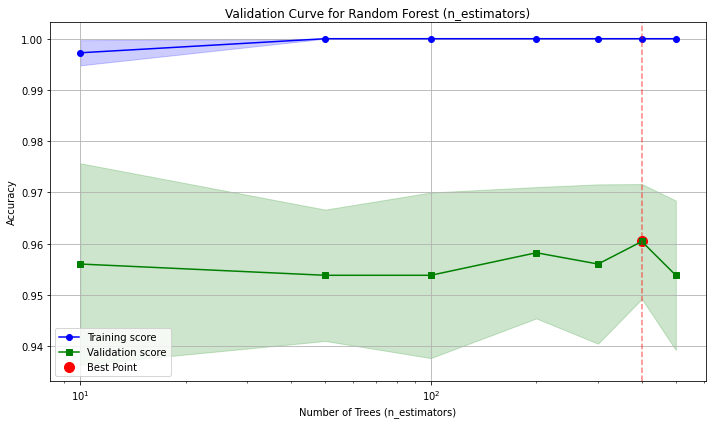

In [38]:
# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

plt.plot(param_range, val_mean, label='Validation score', color='green', marker='s')
plt.fill_between(param_range, val_mean - val_std, val_mean + val_std, alpha=0.2, color='green')

# Mark the best point
best_index = np.argmax(val_mean)
best_n_estimators = param_range[best_index]
best_score = val_mean[best_index]

print(f"Best n_estimators: {best_n_estimators} with validation accuracy: {best_score:.4f}")

plt.scatter([best_n_estimators], [best_score], color='red', s=100, label='Best Point')
plt.axvline(x=best_n_estimators, color='red', linestyle='--', alpha=0.5)
plt.legend()

# Labels and legend
plt.title('Validation Curve for Random Forest (n_estimators)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.xscale('log')  # optional: helps spread out large values nicely
plt.tight_layout()
plt.show()

* Since best estimator is already 100, then n_estimator =100. No need to do another model training 

## Random Forest makes no assumption about data distribution -Non-parametric.

### Proof:
* This means, whether or not we use the scaled data (like in KNN), we would likely have the same result 
* Now we would use the _X\_train_ (unscaled) and compare the result to _X-train-scaled_

In [39]:
# Retrain the model with X_train @ same n_estimators = 100

randforest_unscaled = RandomForestClassifier(n_estimators= 100)

# train the model
randforest_unscaled.fit(X= X_train,
                        y= y_train)

# predict the response: 'diagnosis'
pred_randforest_unscaled = randforest_unscaled.predict(X_test)

# check the model performance
print('\n')
print("Classification Report: ")

print(
classification_report(y_true= y_test,
                      y_pred= pred_randforest_unscaled)
)

print('\n')
print("Confusion Matrix: ")

print(
confusion_matrix(y_true= y_test,
                      y_pred= pred_randforest_unscaled)
)

print('\n')
print('Random Forest accuracy using unscaled data: ', round( accuracy_score(y_test, pred_randforest_unscaled), 3))



Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Confusion Matrix: 
[[69  2]
 [ 3 40]]


Random Forest accuracy using unscaled data:  0.956


### Key Insights (for Random Forest):

* Random Forest performed well with overall accuracy = 96%
* Model performance did not differ, using both scaled_data and non-scaled data
* Only 5 patients where misclassified -which is less than 1% of the entire sample/ dataset

In [40]:
# Accuracy

randforest_accuracy = accuracy_score(y_test, pred_randfor)
randforest_accuracy_3sf = round(randforest_accuracy, 3)

print("Accuracy of Random Forest Classifier Model is: ", randforest_accuracy_3sf)

Accuracy of Random Forest Classifier Model is:  0.965


## Logistic Regression

* This is a supervised and <span style="color: red;">parametric</span> machine learning algorithm
* It is used for classification (not "Regression", despite it's name)

In [41]:
from sklearn.linear_model import LogisticRegression

# create the instance
log_model = LogisticRegression()

# fit the data
log_model.fit(X_train_scaled, y_train)

# predict the response from the model
log_model_predictions = log_model.predict(X_test_scaled)

# Model Classification


print('\n')
print("Classification Report: ")

print(
classification_report(y_true= y_test,
                      y_pred= log_model_predictions)
)


print('\n')
print("Confusion Matrix: ")

print(
confusion_matrix(y_true= y_test,
                      y_pred= log_model_predictions)
)

# extract the model's accuracy
log_model_accuracy = accuracy_score(y_test, log_model_predictions)

log_model_accuracy_3sf = round(log_model_accuracy,3)

print('\n')
print(f"Accuracy of Logistic Regression model is: {log_model_accuracy_3sf}")



Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Confusion Matrix: 
[[70  1]
 [ 2 41]]


Accuracy of Logistic Regression model is: 0.974


### Key Insights (for log.reg):

* Logistic Regression performed well with overall accuracy of 97%
* Only 3 patients where misclassified -which is less than 1% of the entire sample/ dataset

# Support Vector Machine (SVM)


* A support vector machine (SVM) is a supervised and  <span style="color: red;">parametric</span> machine learning algorithm
* It's used for classification and regression tasks
* It finds the optimal boundary (hyperplane) to separate data points into different classes. To do this it aims at maximizing the margin between classes by finding the hyperplane that keeps the largest possible distance from the nearest data points of each class
* These nearest points are called "support vectors" and are the only data points that actually matter for defining the decision boundary.
* SVM is <span style="color: red;">parametric</span>  because it has a  <span style="color: red;">*Fixed Functional Form</span>
* SVMs excel in small- and medium datasets, high-dimensional spaces and remain effective even when the number of features exceeds the number of samples
* Hyperparameter tuning: GridSearch is used to search for best parameters: Often use cross-validation to tune the 'C' parameter (regularization strength) and 'gamma' (for 'RBF'-gaussian kernels)




* <span style="color: red;">*Fixed Functional Form</span> refers to the fact that the model assumes a specific mathematical structure that doesn't change regardless of how much data you have. Just like Linear- and Logistic- Regression, parametric models (SVMs) commit to specific functional form upfront:
    * SVMs functional form is always linear combinatin of kernel functions: $ f(x) = \sum \alpha_i y_i K(x_i, x) + b $ 
    * Linear Regression functional form: $ f(x) = w_0 + w_1x_1 + w_2x_2 + ... + w_px_p$
    * Logistics Regession functional form: $ f(x) = \frac{1}{1 + e^{-w^Tx}} $
    * NOTE: Add more data would not necessarily increase the model's complexity or structure vs. in non-parametric model that has no predetermined limit

In [42]:
from sklearn.svm import SVC

In [43]:
# create the instance 
svm_model = SVC()


# fit the data
svm_model.fit(X_train_scaled, y_train)


# make predictions
svm_predictions = svm_model.predict(X_test_scaled)



# Model's Performance
print(

    confusion_matrix(y_test, svm_predictions)

)

print('\n')

print(

    classification_report(y_test, svm_predictions)

)


# Get accuracy score
svm_accuracy = accuracy_score(y_test, svm_predictions)

svm_accuracy_3sf = round(svm_accuracy, 3)

print('\n')
print(f'The accuracy of support vector machine model is: {svm_accuracy_3sf}')

[[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



The accuracy of support vector machine model is: 0.982


## Key Insights (for SVM):

* This model already performs very well with 98% accuracy
* Since our model performs this good, there is no need to do a GridSearch (searching for best parameters to improve the model)

# Result Comparison and Final Conclusion

In [44]:
# make a list of the accuracy scores of all models
all_accuracy_scores = [log_model_accuracy_3sf, knn_accuracy_3sf, randforest_accuracy_3sf, svm_accuracy_3sf]

# label or name of these models
all_model_labels = ['Logistic Regression', 'KNN', 'Random Forest', 'Support Vector Machine']

In [45]:
all_accuracy_scores

[0.974, 0.965, 0.965, 0.982]

Text(0.5, 0, 'Model')

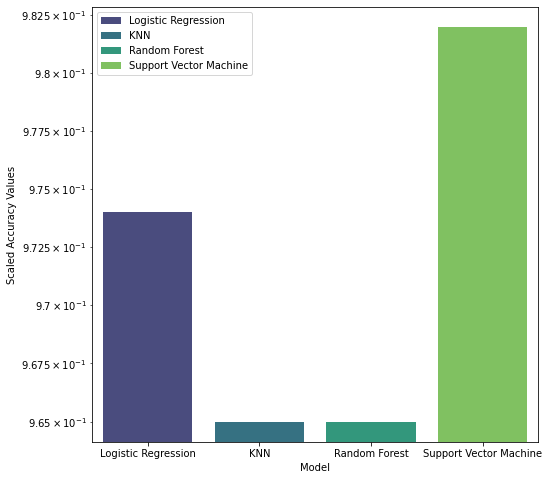

In [46]:
plt.figure(figsize= (8, 8))
sns.barplot(x = all_model_labels, y = all_accuracy_scores,
            hue = all_model_labels, palette= 'viridis',
            legend= True)

    
plt.yscale('log')  # scaling to enable ease in viewing result
plt.ylabel('Scaled Accuracy Values')
plt.xlabel('Model')

##  <span style="color: red;">Conclusion: </span> Support Vector Machine model performed best with 98.2% overall accuracy